In [ ]:
from net2rank.p4c_tools import make_network,make_network_plot_with_pie_charts
import py4cytoscape as p4c
import pandas as pd

# p4c.import_visual_styles('../data/Revelen_style.xml')

In [2]:
from net2rank.p4c_tools import network_cluster, function_enrichment_from_clusters

In [3]:
def parse_cluster_result(cluster_result):
    
    clusters = cluster_result[0]['clusters']
    
    node_list = []
    for cluster in clusters:
        nodes = [node['name'] for node in cluster['nodes']]
        
        if len(nodes) < 10:
            break
        node_list.append(nodes)
    return node_list

def load_predictions(disease_name):
    
    file_pattern = f'../results/test_results/{disease_name}/{disease_name}_fpr_0.05_prediction_results.tsv'
    
    return pd.read_csv(file_pattern, sep='\t')

def pick_cluster_proteins(clusters, idx):
    """
    Select proteins from a specific cluster index.
    """
    return [node_dict['name'] for node_dict in clusters['clusters'][idx]['nodes']]

In [144]:
def cluster_enrichment_pipeline(disease_name,cutoff=0.7,networktype='full STRING network',topk=None):
    """
    Main pipeline to load predictions, create network, cluster, and perform enrichment analysis.
    Args:
        disease_name (str): Name of the disease to load predictions for.
        cutoff (float): Cutoff value for network creation.
        networktype (str): Type of network to create. Defaults to 'full STRING network'; or 'physical subnetwork'.
    """
    df_cat = load_predictions(disease_name)
    if topk is not None:
        df_cat = df_cat.sort_values(by='predicted_score', ascending=False).head(topk)
    
    suid = make_network(
        proteins=df_cat['protein'].tolist(),
        network_name=f'{disease_name}_main_network',
        cutoff=cutoff,
        networktype=networktype)
    
    cluster_result = network_cluster()
    
    df_clusters_enrichment, cluster_proteins = function_enrichment_from_clusters(cluster_result)
    
    return df_cat,df_clusters_enrichment, cluster_proteins

def plot_cluster_network(cluster_proteins, idx, df,disease_name):
    """
    Plot the network for a specific cluster index with pie charts.
    """
    suid = make_network(
        proteins=cluster_proteins[idx],
        network_name=f'{disease_name}_cluster_{idx}_network',
        cutoff=0.7)
    
    suid = make_network_plot_with_pie_charts(
        df_protein_category=df,
        selected_proteins=cluster_proteins[idx],
        suid=suid,)
    p4c.layout_network('force-directed',network=suid)
    p4c.notebook_export_show_image()
    
    return suid


In [ ]:
df_cat, df_clusters_enrichment,cluster_proteins = cluster_enrichment_pipeline('atopic_dermatitis')

In [6]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==1]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
615,GO:0070098,Chemokine-mediated signaling pathway,5.210000e-113,55,82,Process,1
616,GO:0060326,Cell chemotaxis,2.920000e-110,60,210,Process,1
617,GO:0030595,Leukocyte chemotaxis,1.950000e-78,46,149,Process,1
618,GO:0030593,Neutrophil chemotaxis,6.250000e-71,39,80,Process,1
619,GO:0034097,Response to cytokine,4.540000e-68,56,804,Process,1
...,...,...,...,...,...,...,...
812,WP5088,Prostaglandin signaling,2.100000e-04,4,32,WikiPathways,1
813,WP4655,Cytosolic DNA-sensing pathway,4.100000e-03,4,73,WikiPathways,1
814,WP117,"GPCRs, other",8.700000e-03,4,91,WikiPathways,1
815,WP5078,T cell modulation in pancreatic cancer,1.710000e-02,3,45,WikiPathways,1


In [7]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==7]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
1643,GO:0031424,Keratinization,1.090000e-31,16,83,Process,7
1644,GO:0031640,Killing of cells of another organism,8.020000e-06,5,71,Process,7
1645,GO:0050830,Defense response to Gram-positive bacterium,1.200000e-04,5,130,Process,7
1646,GO:0009253,Peptidoglycan catabolic process,1.810000e-02,2,6,Process,7
1647,HSA-6809371,Formation of the cornified envelope,6.950000e-27,15,128,RCTM,7


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


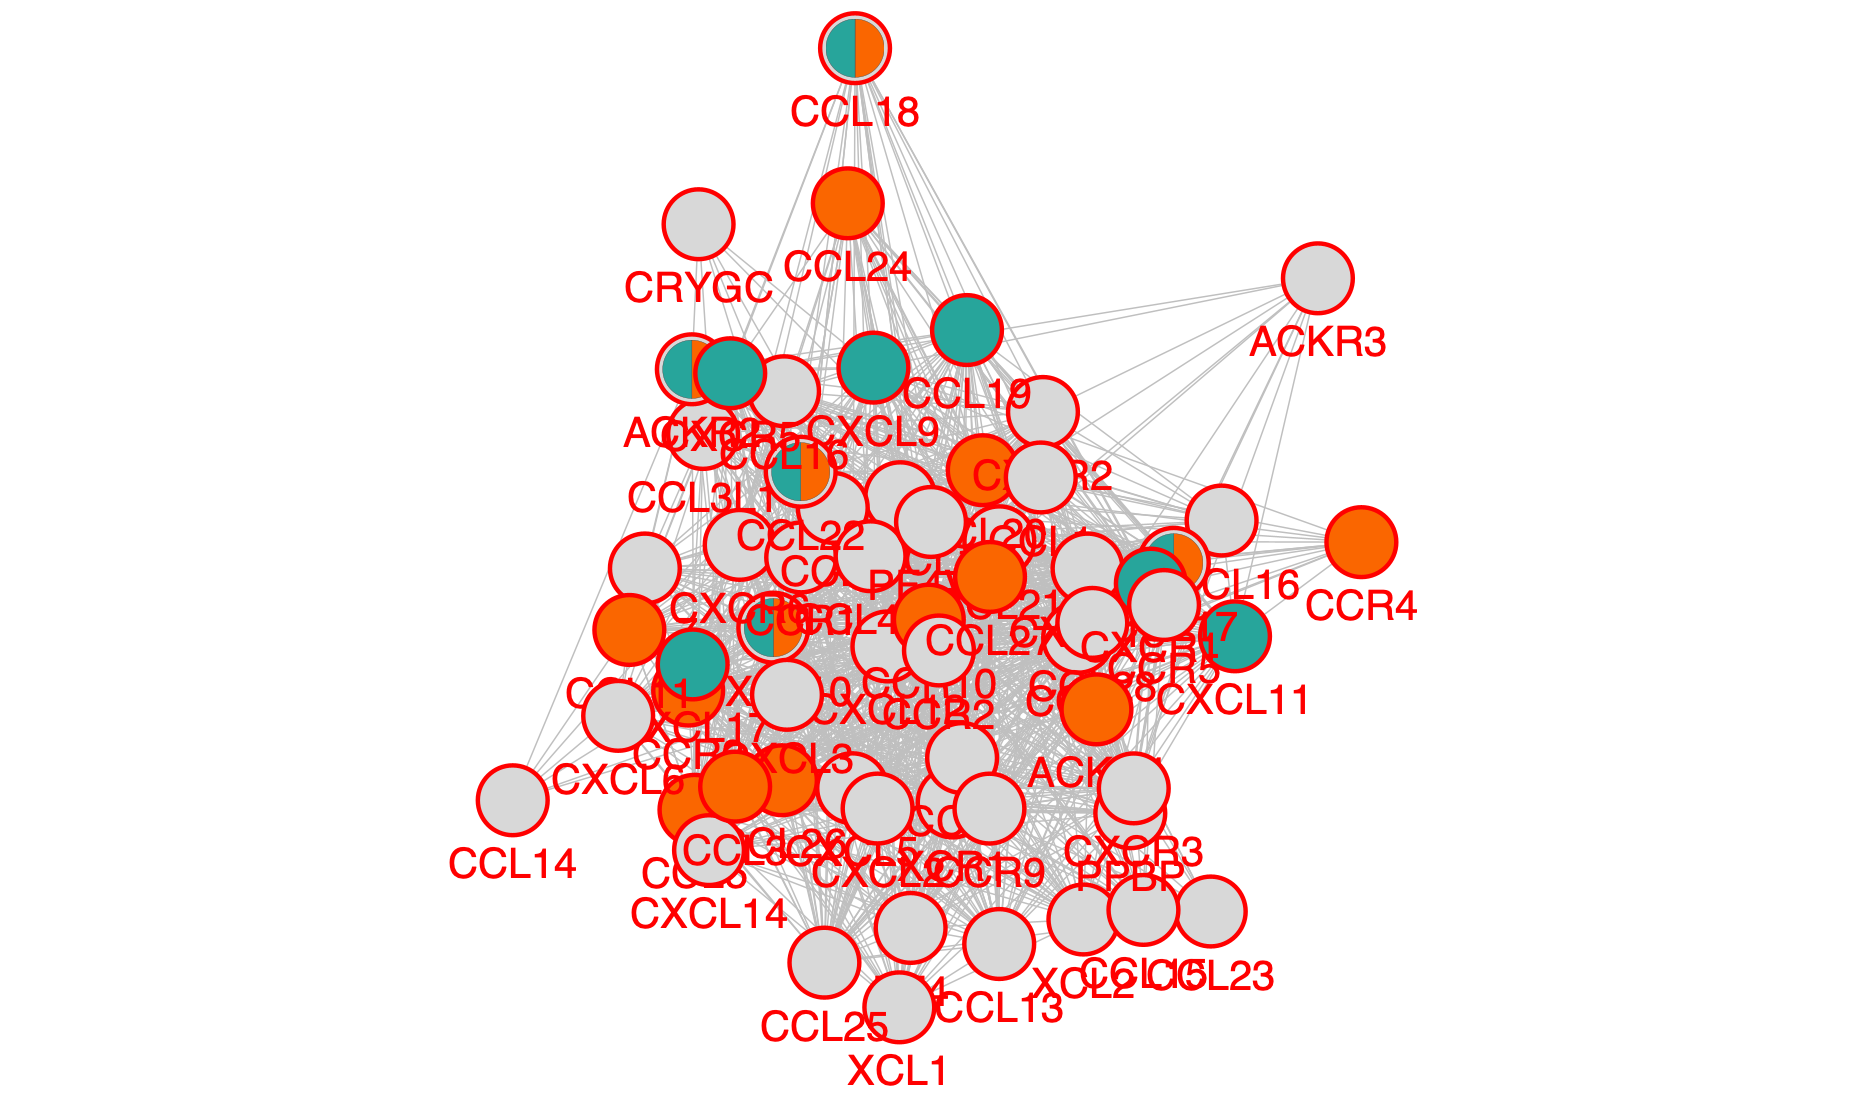

In [ ]:
plot_cluster_network(cluster_proteins, 1, df_cat,disease_name='atopic_dermatitis')
p4c.notebook_export_show_image()

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


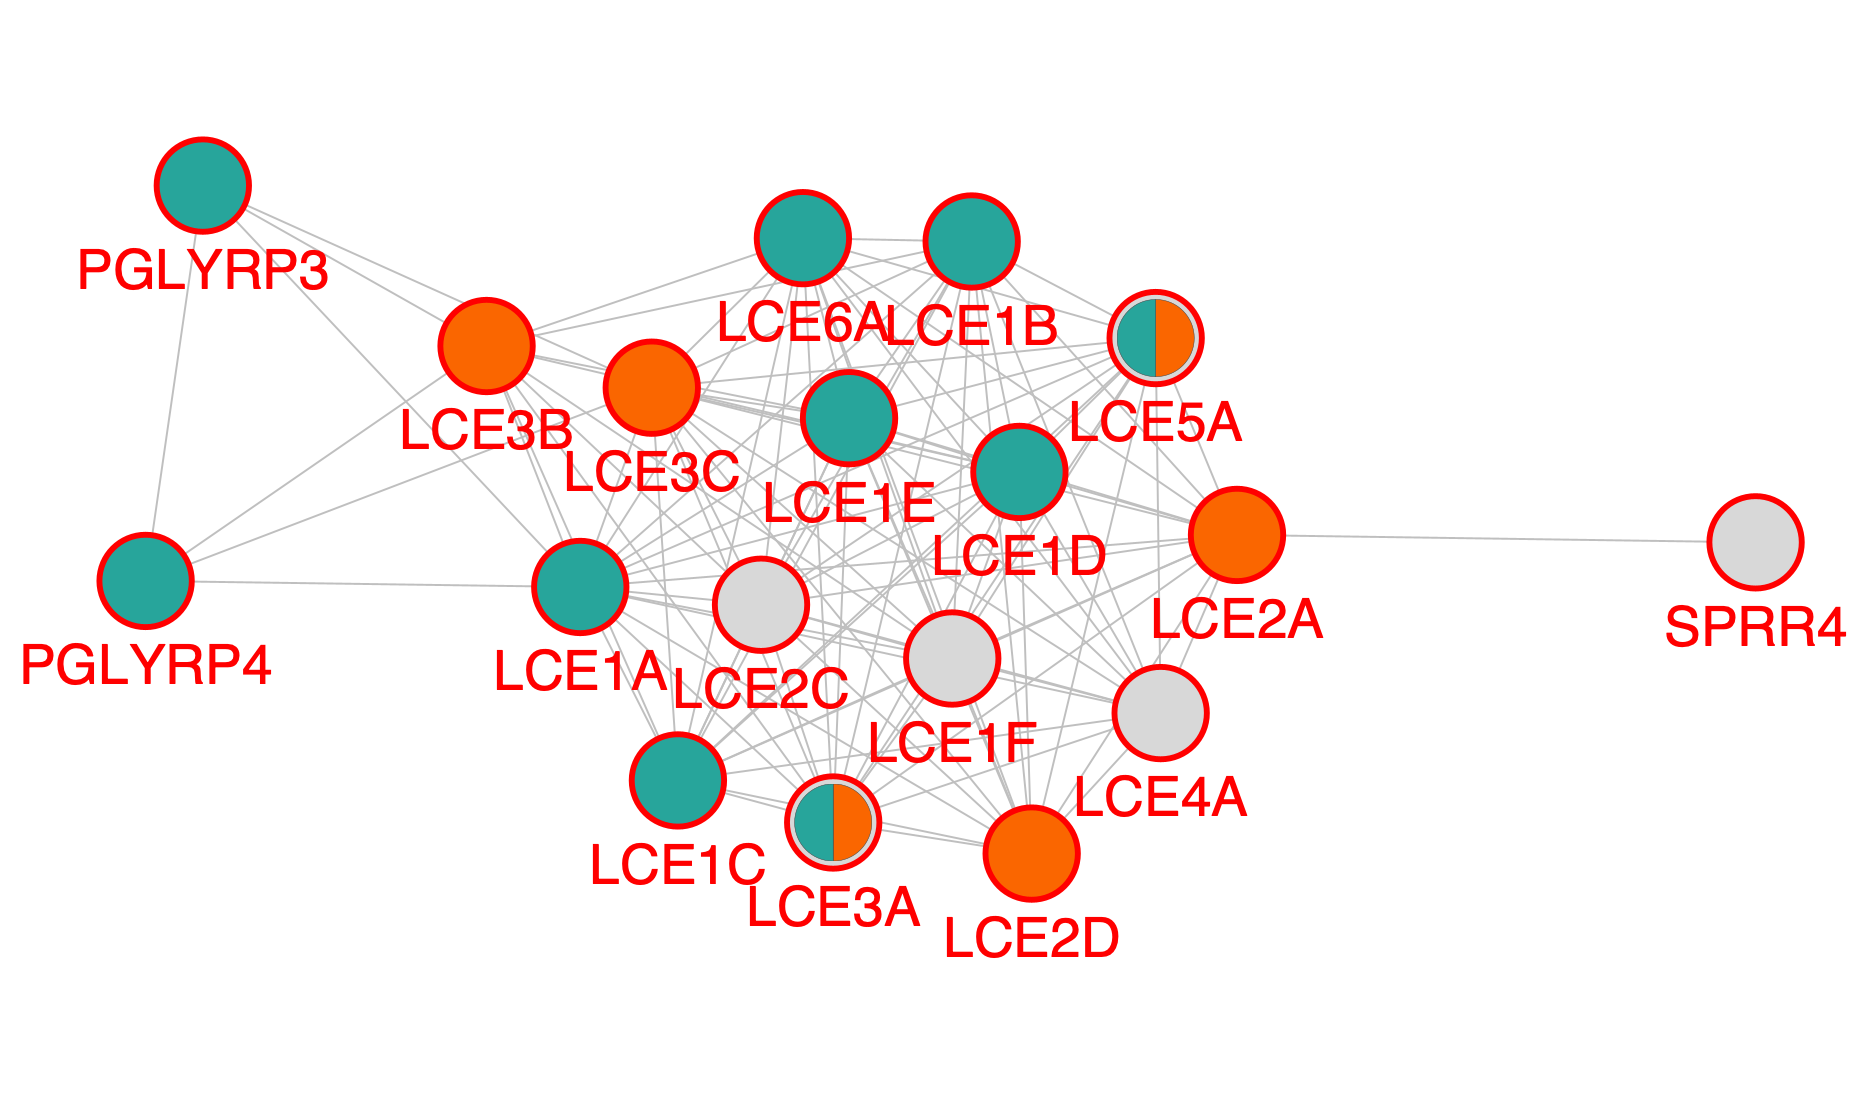

In [ ]:
plot_cluster_network(cluster_proteins, 7, df_cat,disease_name='atopic_dermatitis')
p4c.notebook_export_show_image()

## UC

In [33]:
df_cat, df_clusters_enrichment,cluster_proteins = cluster_enrichment_pipeline('ulcerative_colitis')

In [35]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==5]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
1614,GO:0070830,Bicellular tight junction assembly,7.300000e-26,14,49,Process,5
1615,GO:0045216,Cell-cell junction organization,6.240000e-24,16,174,Process,5
1616,GO:0007043,Cell-cell junction assembly,7.820000e-24,15,124,Process,5
1617,GO:0016338,Calcium-independent cell-cell adhesion via pla...,7.850000e-20,10,21,Process,5
1618,GO:0035633,Maintenance of blood-brain barrier,3.390000e-18,10,34,Process,5
1619,GO:0098609,Cell-cell adhesion,7.100000e-15,15,542,Process,5
1620,GO:0007155,Cell adhesion,8.230000e-13,16,965,Process,5
1621,GO:0098742,Cell-cell adhesion via plasma-membrane adhesio...,9.170000e-12,11,267,Process,5
1622,GO:0061028,Establishment of endothelial barrier,3.060000e-11,7,33,Process,5
1623,GO:0048871,Multicellular organismal homeostasis,2.510000e-10,11,372,Process,5


In [38]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==7]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
1718,GO:0070269,Pyroptosis,1.360000e-22,11,27,Process,7
1719,GO:0032651,Regulation of interleukin-1 beta production,4.890000e-20,12,95,Process,7
1720,GO:0052548,Regulation of endopeptidase activity,5.860000e-15,13,414,Process,7
1721,GO:0032731,Positive regulation of interleukin-1 beta prod...,7.810000e-15,9,61,Process,7
1722,GO:2000116,Regulation of cysteine-type endopeptidase acti...,5.510000e-14,11,236,Process,7
...,...,...,...,...,...,...,...
1853,WP5088,Prostaglandin signaling,1.100000e-03,3,32,WikiPathways,7
1854,WP3890,Nanomaterial-induced inflammasome activation,5.500000e-03,2,7,WikiPathways,7
1855,WP4655,Cytosolic DNA-sensing pathway,6.700000e-03,3,73,WikiPathways,7
1856,WP5322,CKAP4 signaling pathway map,2.030000e-02,3,114,WikiPathways,7


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


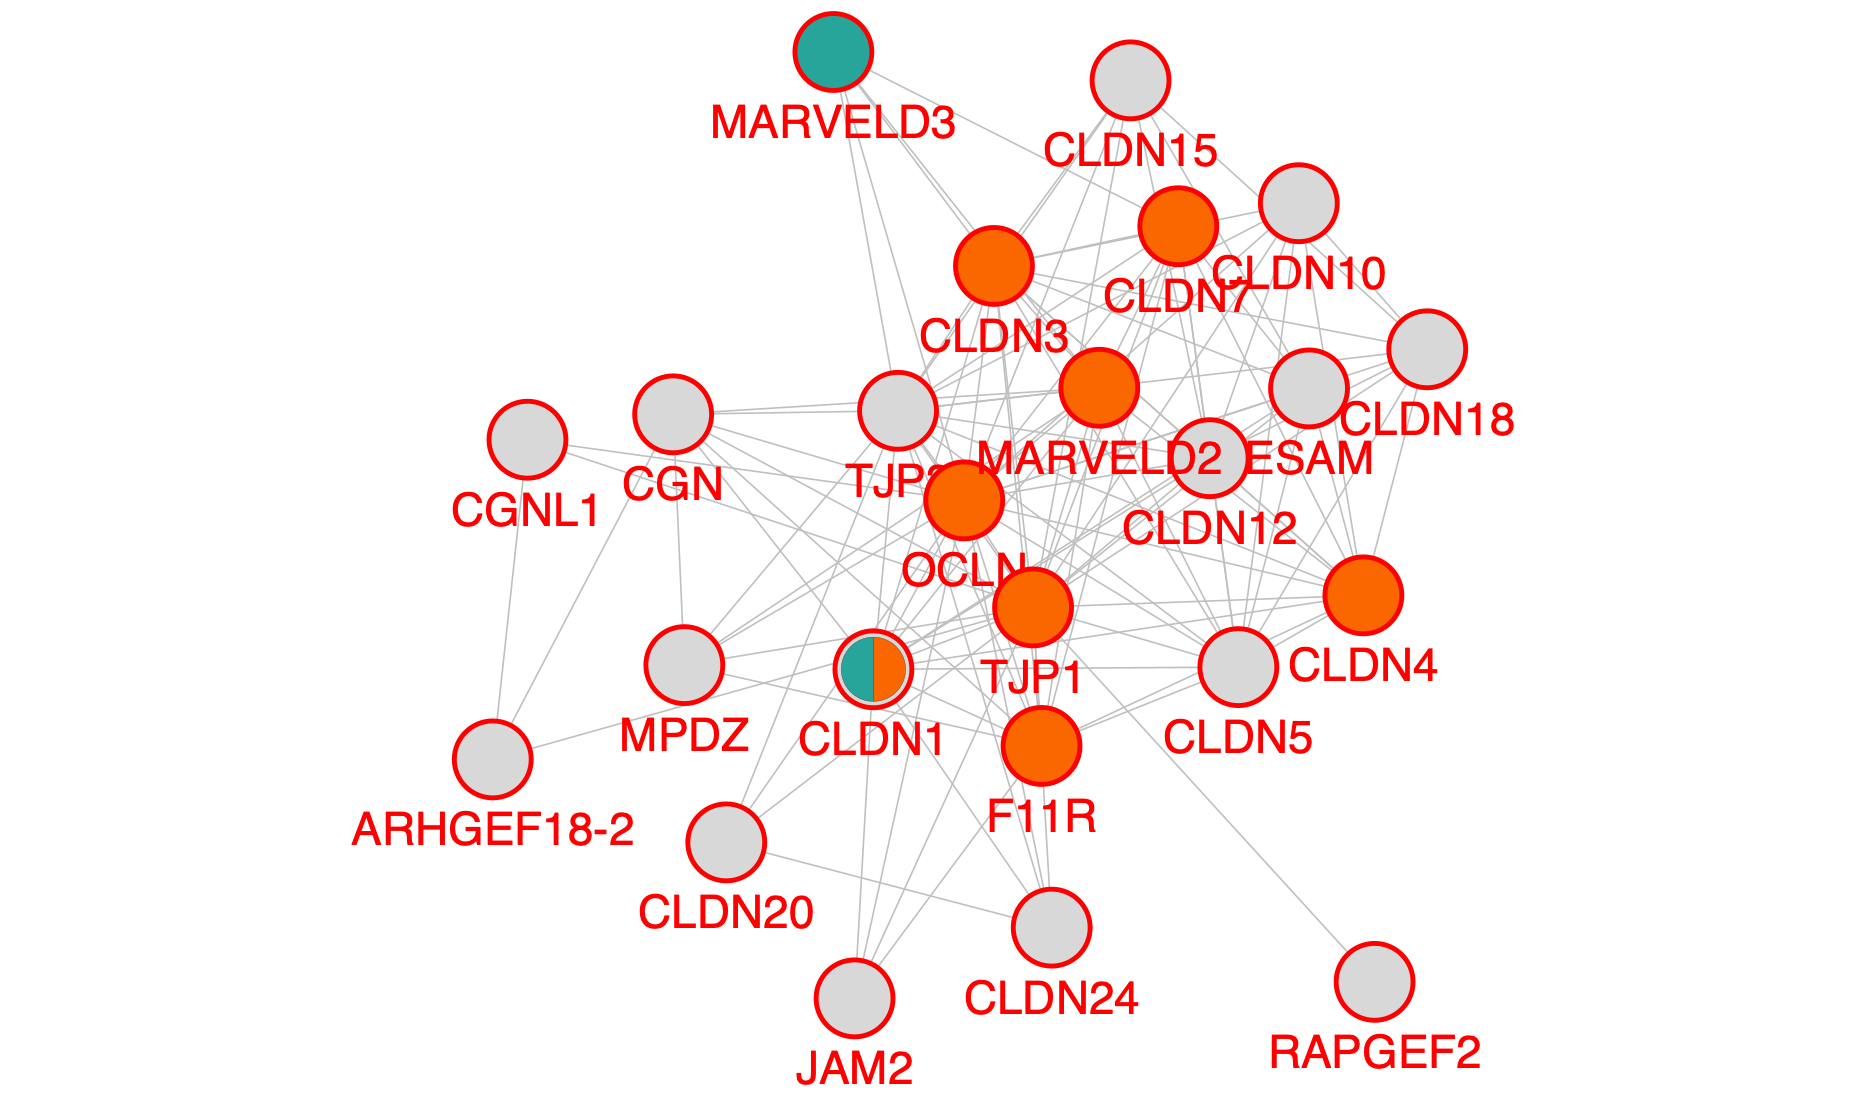

In [39]:
plot_cluster_network(cluster_proteins, 5, df_cat,disease_name='ulcerative_colitis')
p4c.notebook_export_show_image()

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


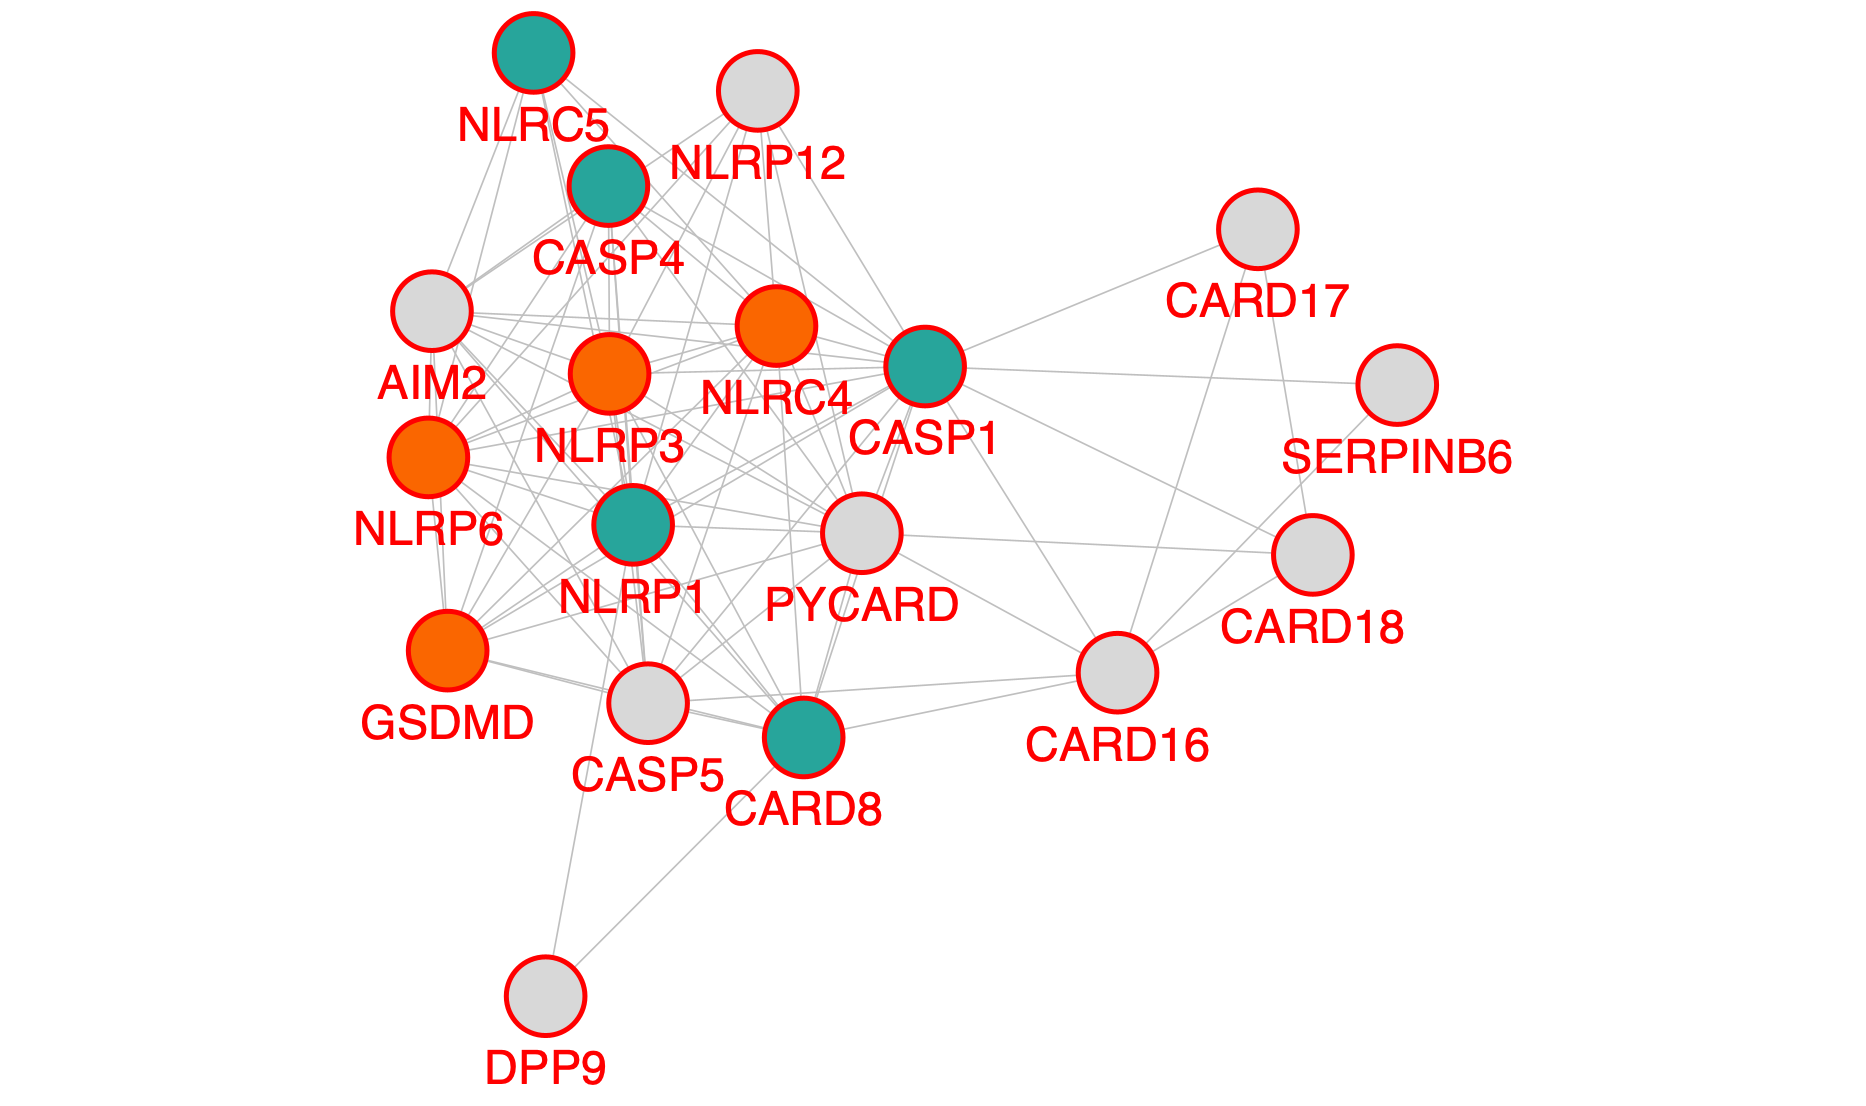

In [41]:
plot_cluster_network(cluster_proteins, 7, df_cat,disease_name='ulcerative_colitis')
p4c.notebook_export_show_image()

## focal epilepsy

In [42]:
df_cat, df_clusters_enrichment,cluster_proteins = cluster_enrichment_pipeline('focal_epilepsy')

In [70]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==4]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
492,HSA-5682910,LGI-ADAM interactions,5.470000e-07,4,14,RCTM,4


In [69]:
df_cat[df_cat['protein'].isin(cluster_proteins[4])]

,protein,predicted_score,category
144,9606.ENSP00000345229,0.288858,training
146,9606.ENSP00000265727,0.288200,text_mining
208,9606.ENSP00000360472,0.268202,text_mining
282,9606.ENSP00000312273,0.254957,text_mining
402,9606.ENSP00000429344,0.234362,text_mining
532,9606.ENSP00000435509,0.218945,novel
551,9606.ENSP00000288699,0.217845,novel
592,9606.ENSP00000302297,0.212391,novel
629,9606.ENSP00000265769,0.207995,both
714,9606.ENSP00000270642,0.201024,novel


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


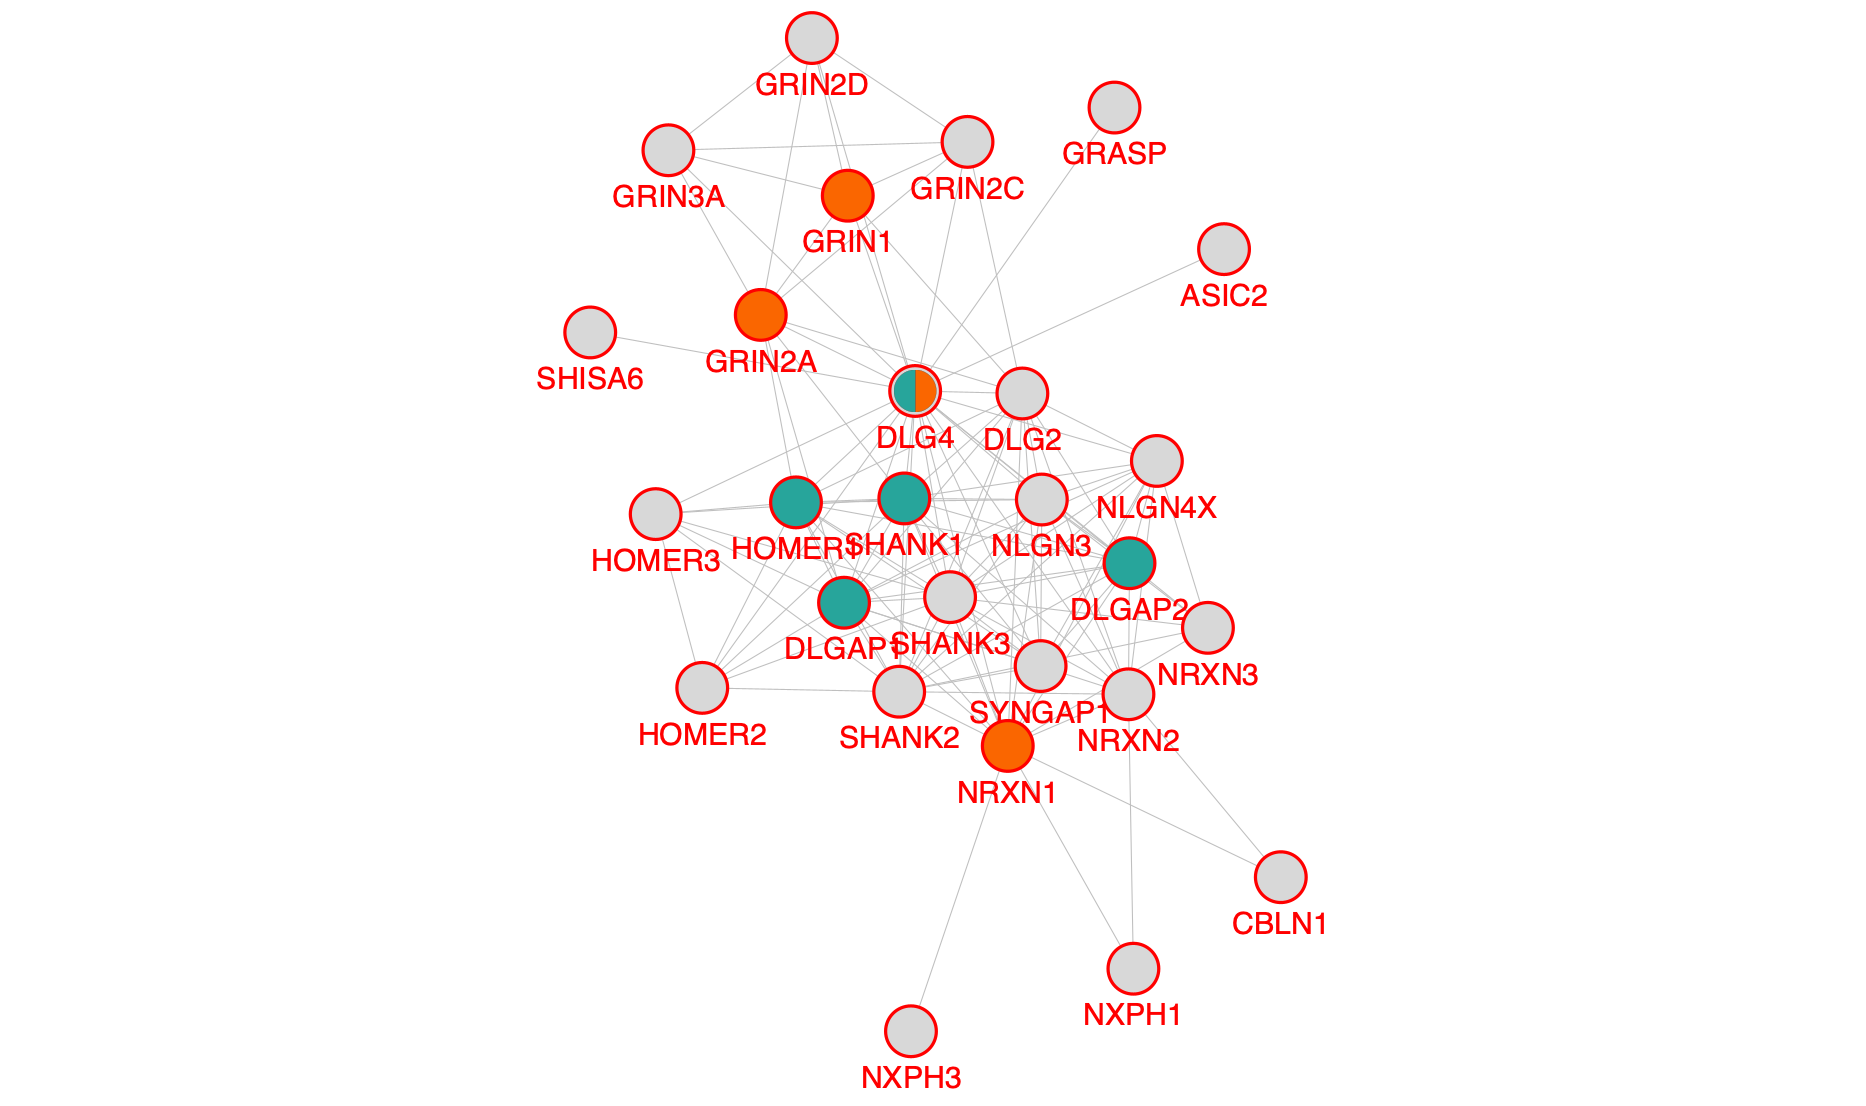

In [63]:
plot_cluster_network(cluster_proteins, 0, df_cat,disease_name='focal_epilepsy')
p4c.notebook_export_show_image()

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


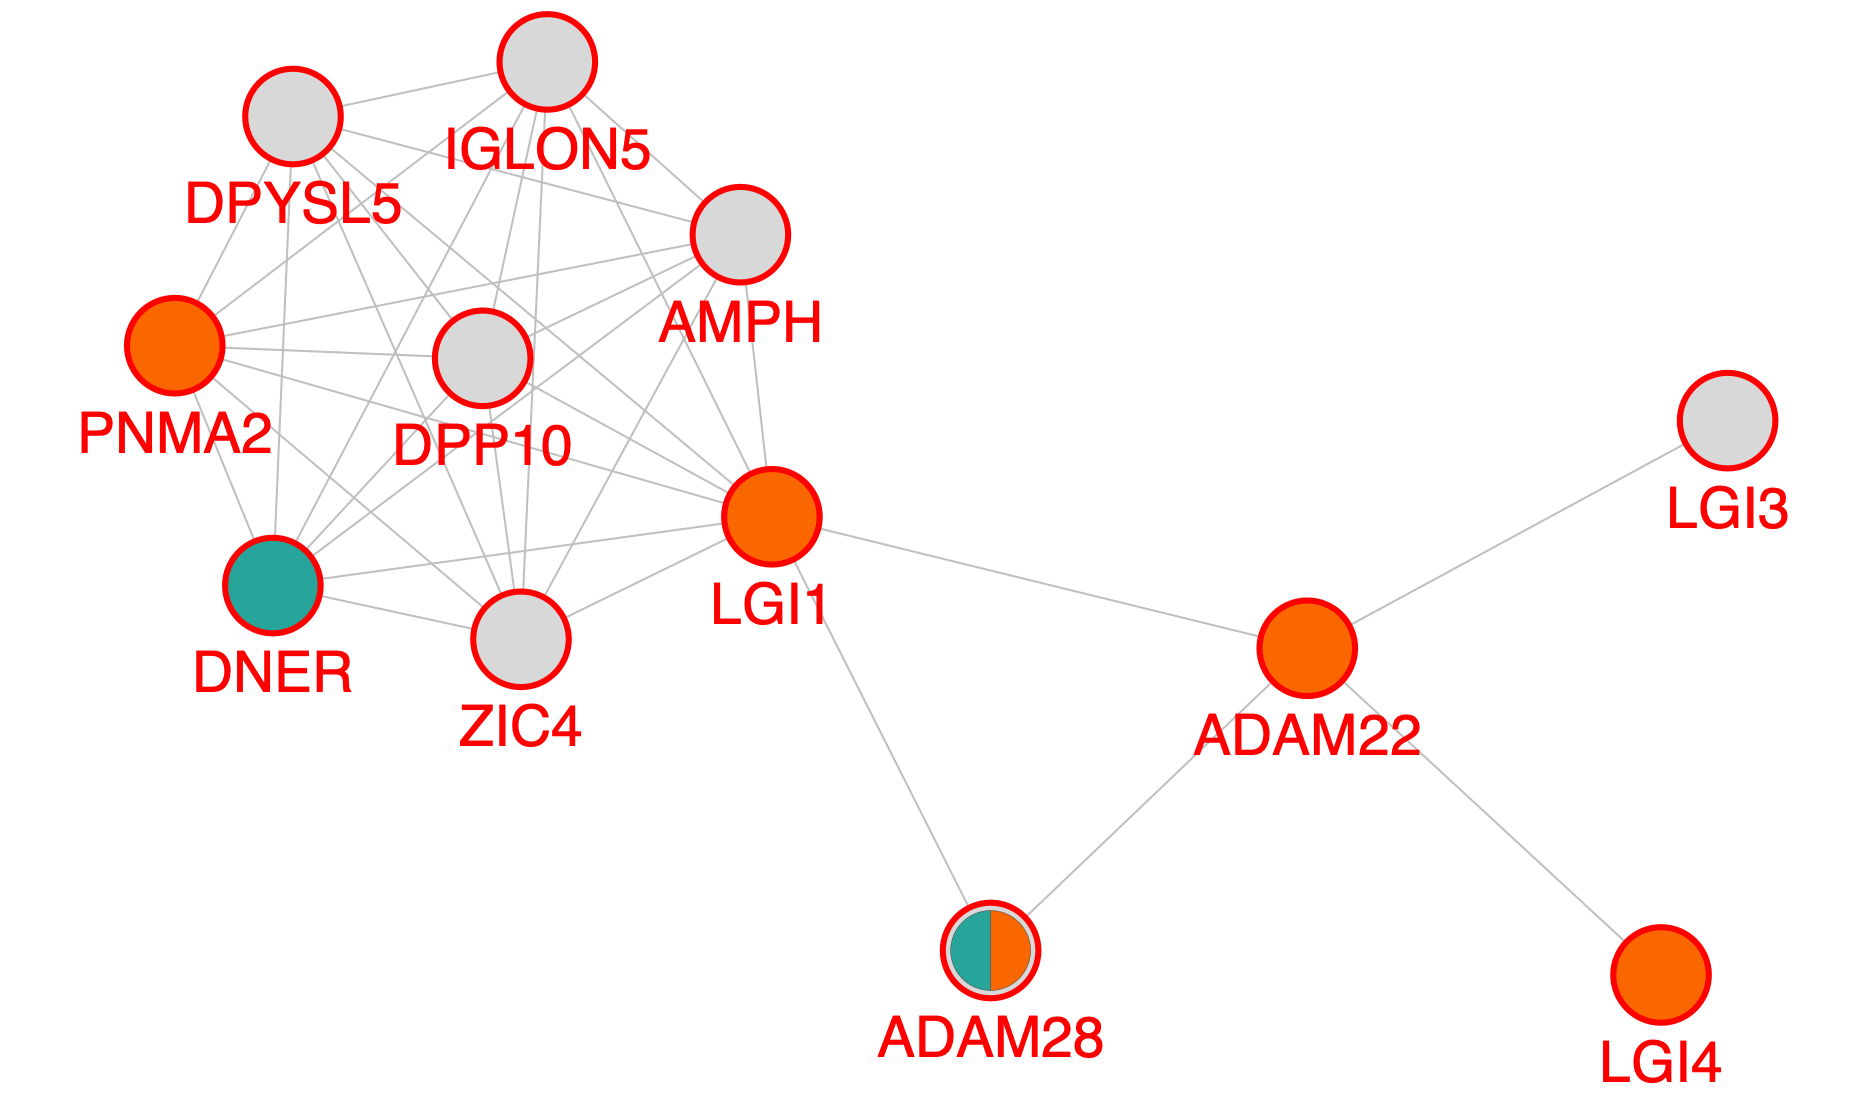

In [71]:
plot_cluster_network(cluster_proteins, 4, df_cat,disease_name='focal_epilepsy')
p4c.notebook_export_show_image()

## melanoma

In [145]:
df_cat, df_clusters_enrichment,cluster_proteins = cluster_enrichment_pipeline('melanoma', cutoff=0.9,networktype='physical subnetwork',topk=500)

In [146]:
len(cluster_proteins)

3

In [149]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==2]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
168,GO:0006281,DNA repair,2.110000e-20,15,497,Process,2
169,GO:0006302,Double-strand break repair,2.110000e-20,13,204,Process,2
170,GO:0006310,DNA recombination,1.580000e-17,12,235,Process,2
171,GO:0010212,Response to ionizing radiation,1.600000e-17,11,143,Process,2
172,GO:0009314,Response to radiation,1.950000e-14,12,444,Process,2
...,...,...,...,...,...,...,...
372,WP2261,Glioblastoma signaling pathways,1.300000e-03,3,82,WikiPathways,2
373,WP5322,CKAP4 signaling pathway map,3.300000e-03,3,114,WikiPathways,2
374,WP3982,miRNA regulation of p53 pathway in prostate ca...,6.200000e-03,2,24,WikiPathways,2
375,WP4753,Nucleotide excision repair,1.860000e-02,2,44,WikiPathways,2


In [79]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==8]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
1221,GO:0000079,Regulation of cyclin-dependent protein serine/...,1.650000e-21,13,111,Process,8
1222,GO:0044843,Cell cycle G1/S phase transition,1.380000e-20,12,88,Process,8
1223,GO:0044772,Mitotic cell cycle phase transition,9.880000e-20,13,173,Process,8
1224,GO:0051726,Regulation of cell cycle,1.150000e-19,18,1108,Process,8
1225,GO:0000082,G1/S transition of mitotic cell cycle,1.580000e-18,11,86,Process,8
...,...,...,...,...,...,...,...
1440,WP2572,Primary focal segmental glomerulosclerosis (FSGS),2.620000e-02,2,72,WikiPathways,8
1441,WP4216,Chromosomal and microsatellite instability in ...,2.620000e-02,2,72,WikiPathways,8
1442,WP2882,Nuclear receptors meta-pathway,3.420000e-02,3,312,WikiPathways,8
1443,WP5098,T-cell activation SARS-CoV-2,3.670000e-02,2,88,WikiPathways,8


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


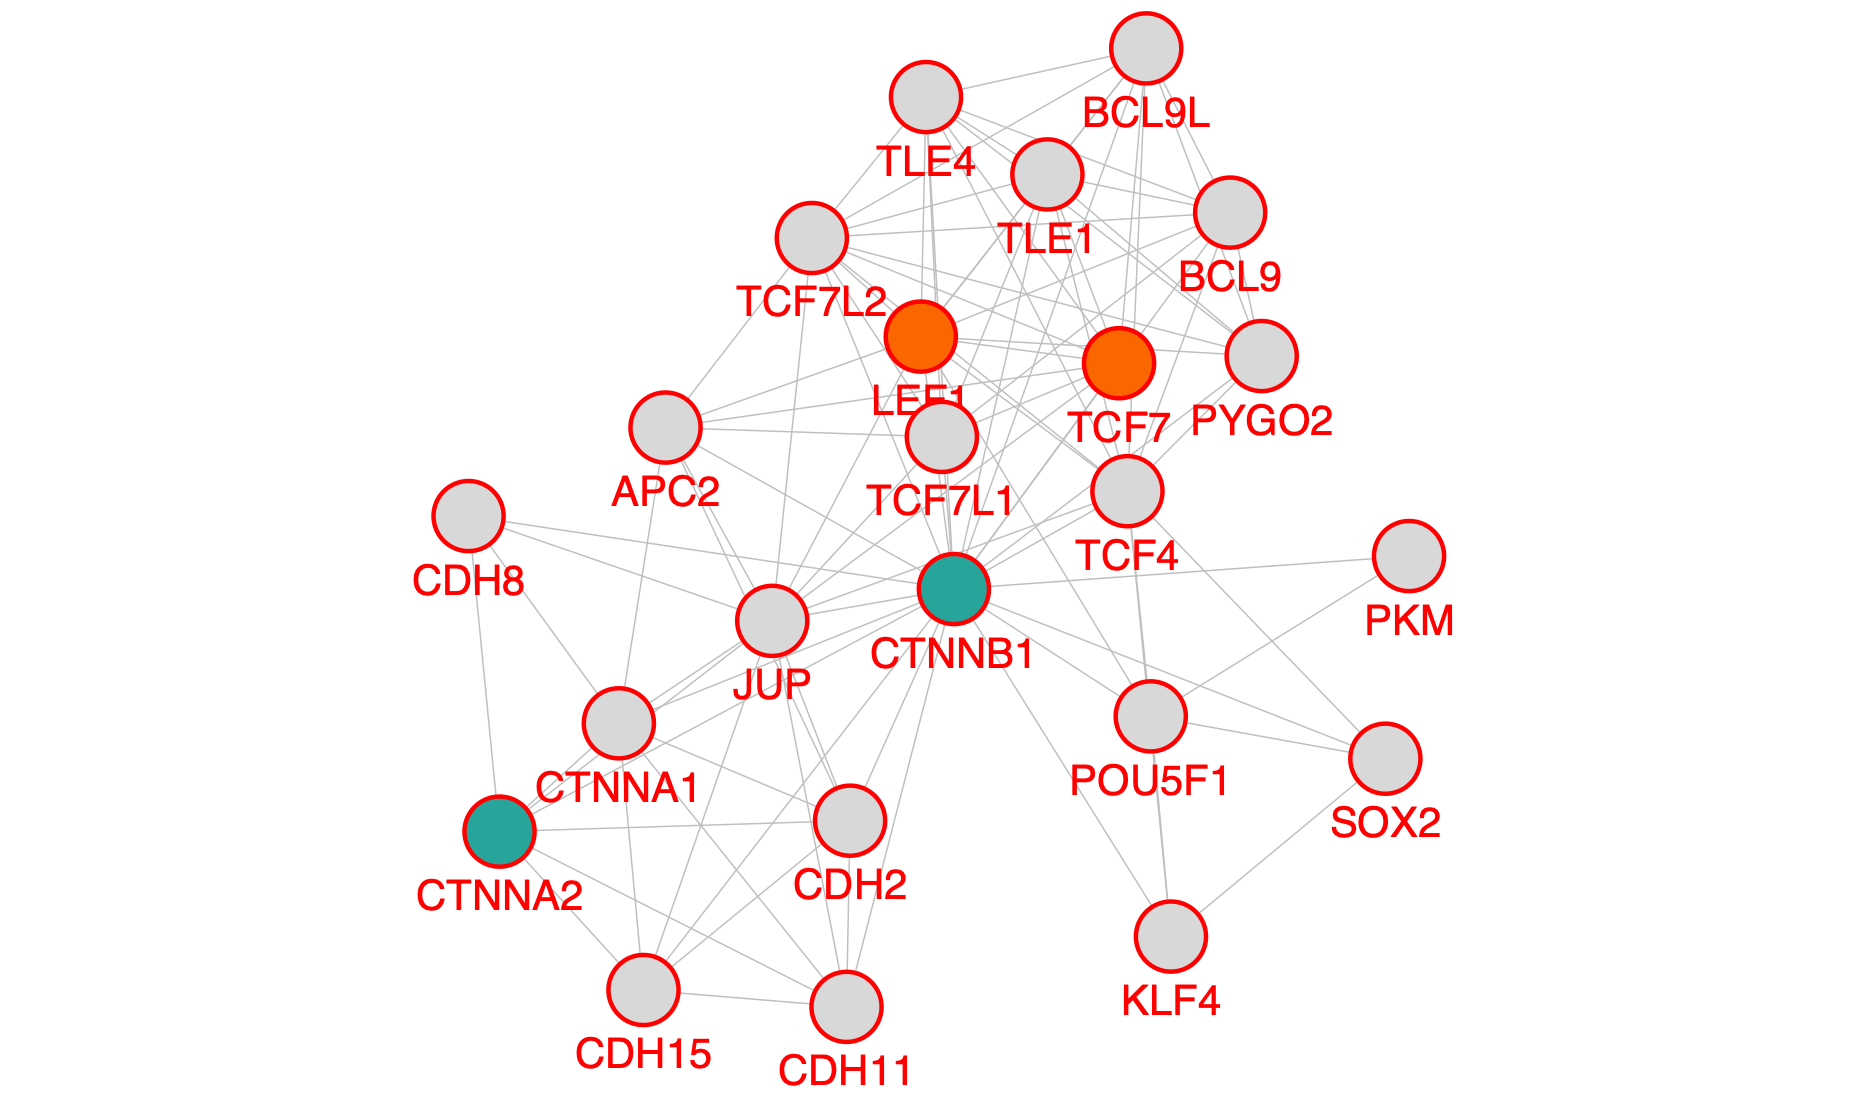

In [87]:
plot_cluster_network(cluster_proteins, 3, df_cat,disease_name='melanoma')
p4c.notebook_export_show_image()

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


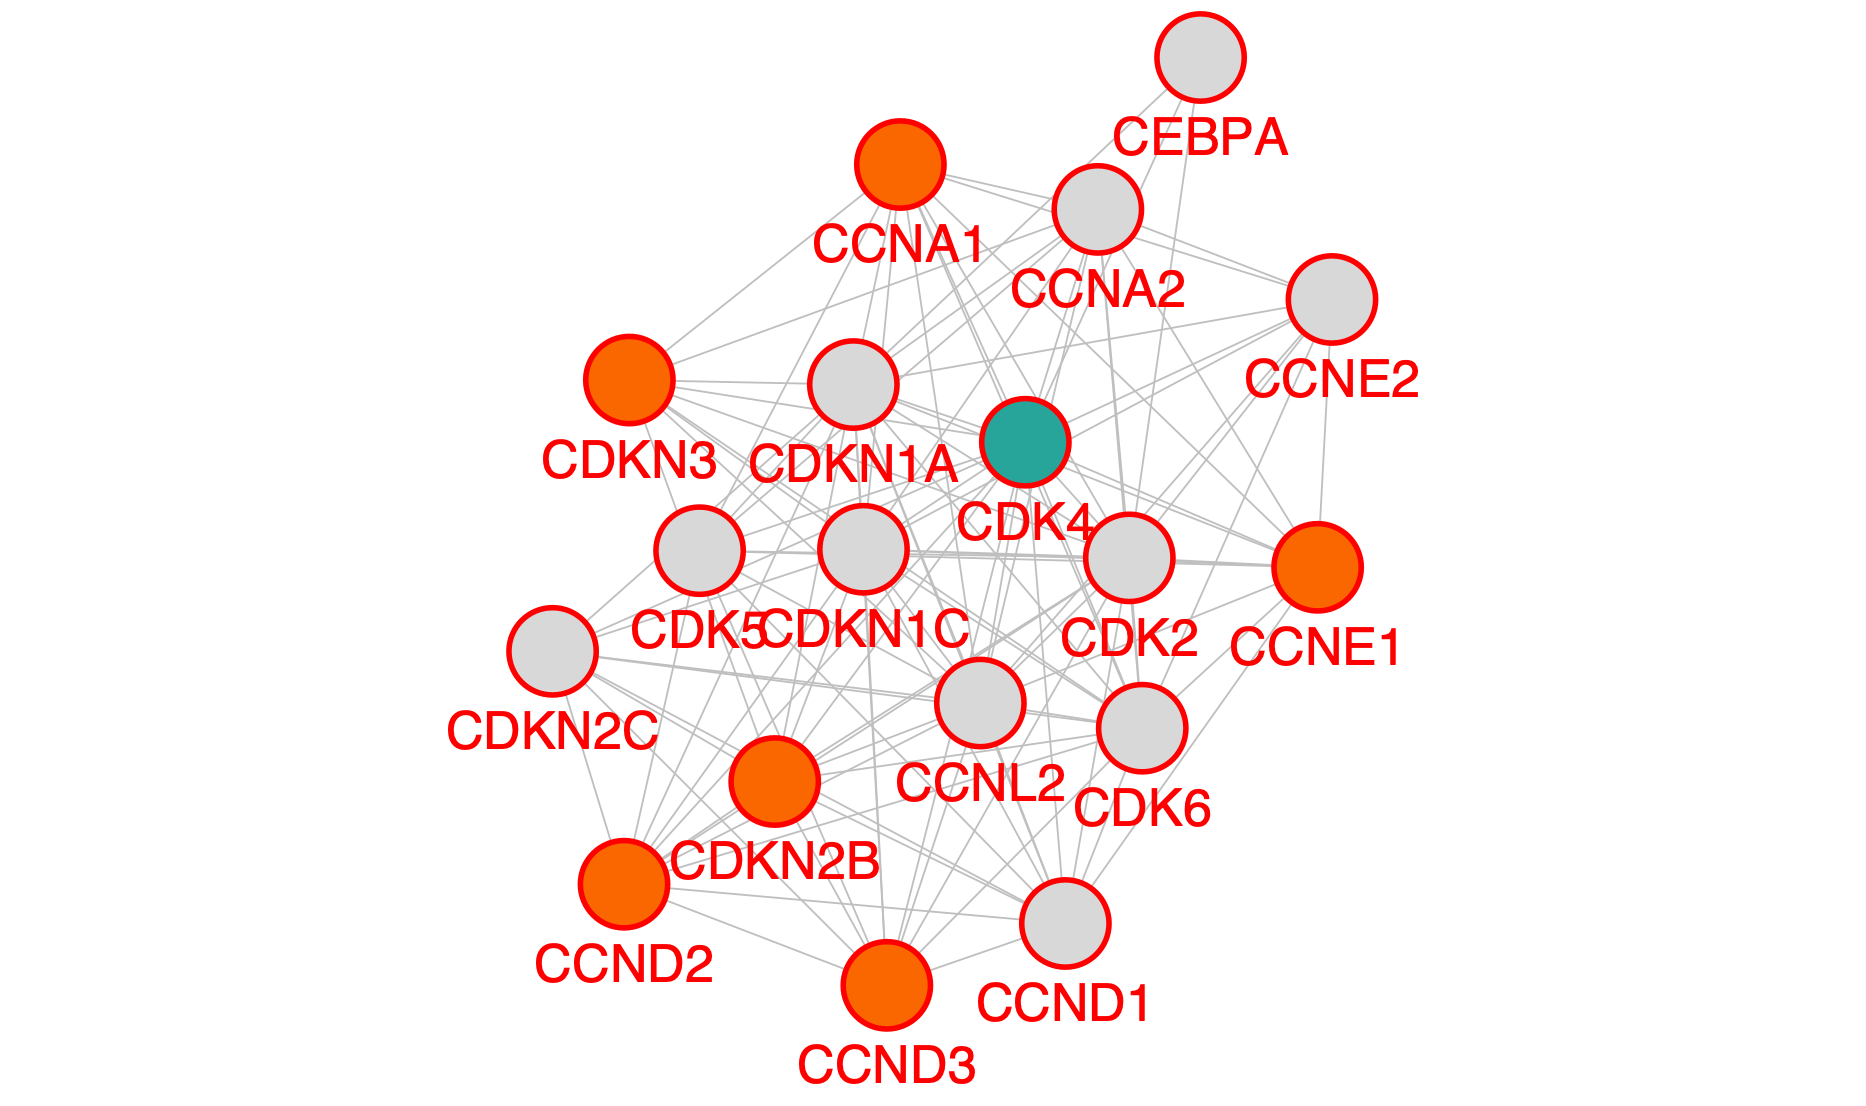

In [80]:
plot_cluster_network(cluster_proteins, 8, df_cat,disease_name='melanoma')
p4c.notebook_export_show_image()

## colorectal_adenocarcinoma

In [91]:
df_cat, df_clusters_enrichment,cluster_proteins = cluster_enrichment_pipeline('colorectal_adenocarcinoma', cutoff=0.9,networktype='physical subnetwork')

In [110]:
len(cluster_proteins)

21

In [118]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==15]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
2220,GO:0046854,Phosphatidylinositol phosphate biosynthetic pr...,1.740000e-18,10,66,Process,15
2221,GO:0048015,Phosphatidylinositol-mediated signaling,4.630000e-18,10,79,Process,15
2222,GO:0014065,Phosphatidylinositol 3-kinase signaling,1.200000e-17,9,45,Process,15
2223,GO:0046486,Glycerolipid metabolic process,1.090000e-14,11,357,Process,15
2224,GO:0035556,Intracellular signal transduction,4.000000e-12,13,1518,Process,15
...,...,...,...,...,...,...,...
2619,WP138,Androgen receptor signaling pathway,1.460000e-02,2,90,WikiPathways,15
2620,WP5323,Fatty Acids and Lipoproteins Transport in Hepa...,1.600000e-02,3,380,WikiPathways,15
2621,WP2263,Androgen receptor network in prostate cancer,2.070000e-02,2,109,WikiPathways,15
2622,WP4549,Fragile X syndrome,2.500000e-02,2,121,WikiPathways,15


In [ ]:
df_cat[df_cat['protein'].isin(cluster_proteins[15])]

,protein,predicted_score,category
49,9606.ENSP00000216373,0.166056,novel
175,9606.ENSP00000447241,0.072191,novel
326,9606.ENSP00000376345,0.044543,novel
328,9606.ENSP00000241453,0.044420,novel
347,9606.ENSP00000262995,0.042711,novel
514,9606.ENSP00000378485,0.029952,novel
593,9606.ENSP00000345492,0.026177,novel
596,9606.ENSP00000364995,0.026060,novel
882,9606.ENSP00000378845,0.017938,novel
1149,9606.ENSP00000329668,0.013165,novel


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


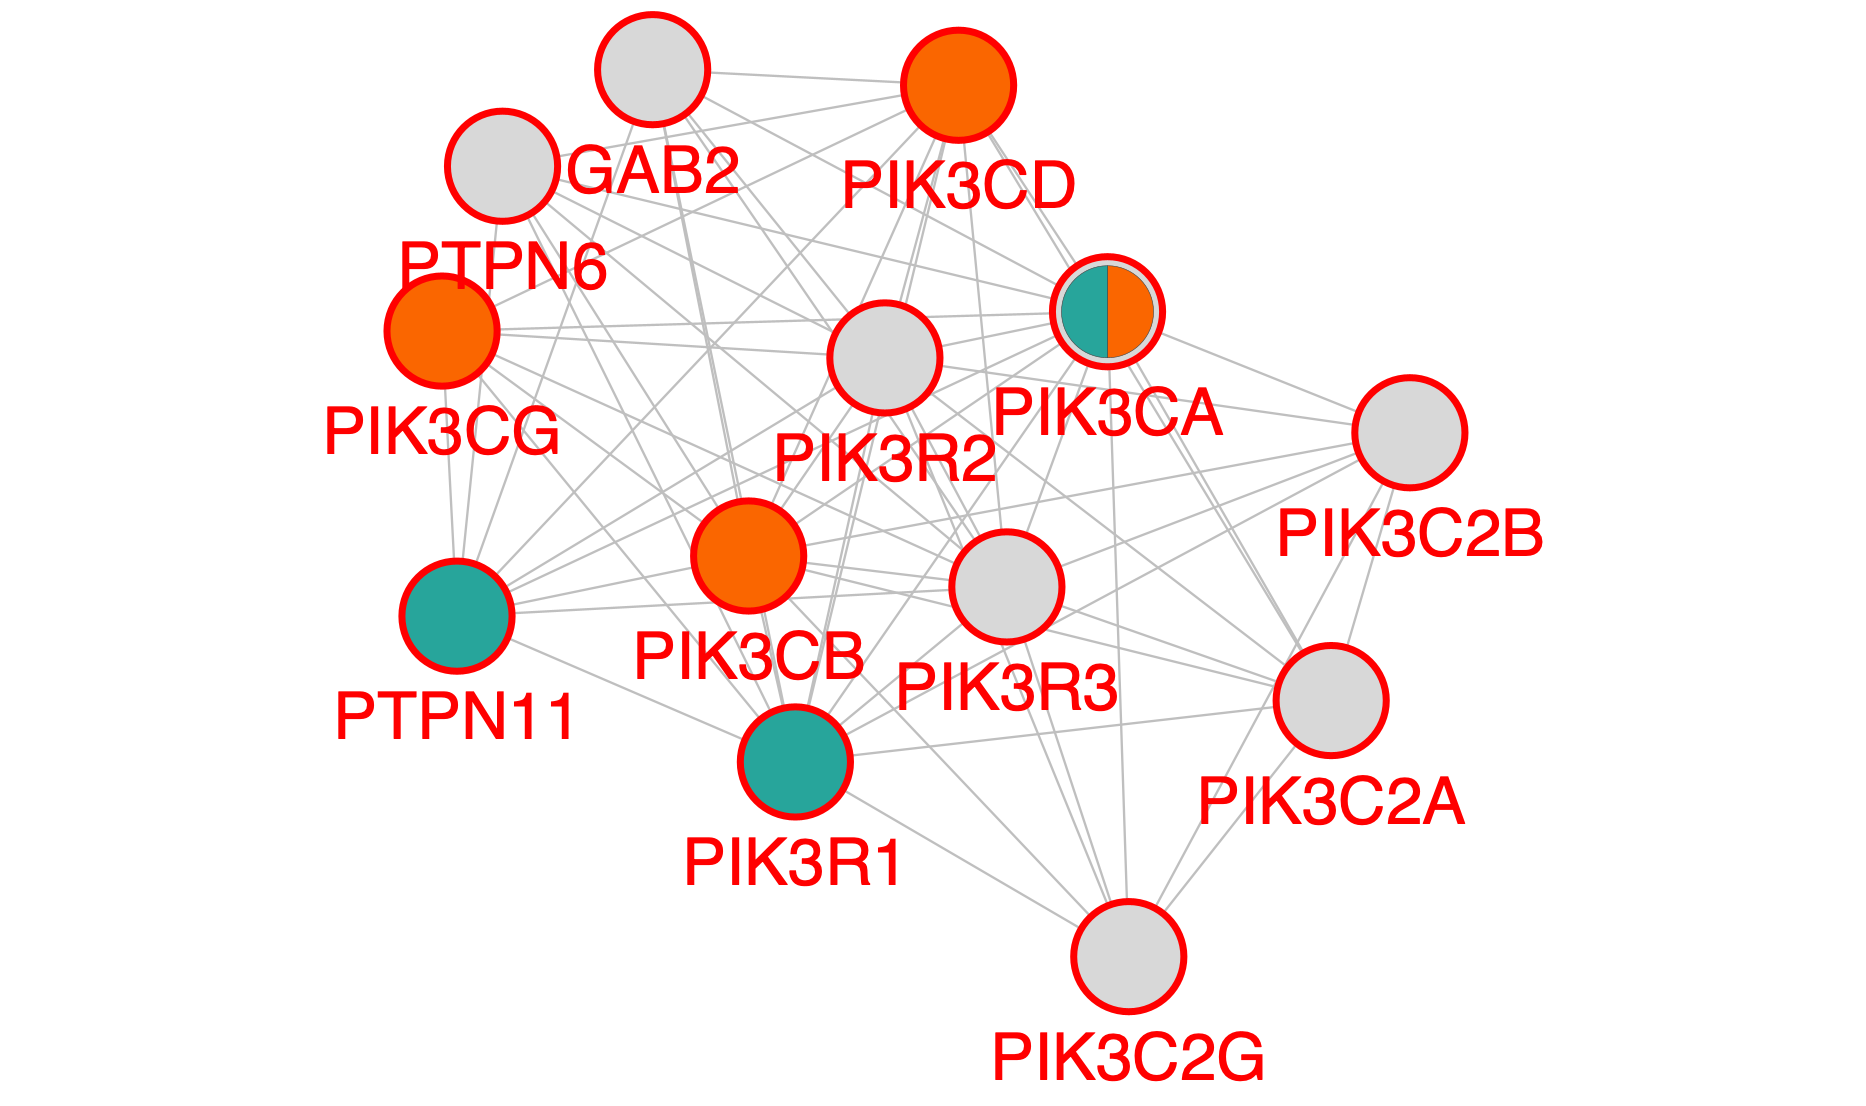

In [119]:
plot_cluster_network(cluster_proteins, 15, df_cat,disease_name='colorectal_adenocarcinoma')
p4c.notebook_export_show_image()

## aortic_aneurysm

In [150]:
df_cat, df_clusters_enrichment,cluster_proteins = cluster_enrichment_pipeline('aortic_aneurysm')

In [151]:
len(cluster_proteins)

8

In [158]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==0]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
0,GO:0030198,Extracellular matrix organization,8.210000e-35,29,278,Process,0
1,GO:0032963,Collagen metabolic process,3.010000e-19,14,61,Process,0
2,GO:0007155,Cell adhesion,5.200000e-18,27,965,Process,0
3,GO:0009888,Tissue development,3.410000e-16,31,1723,Process,0
4,GO:0035987,Endodermal cell differentiation,3.860000e-13,10,44,Process,0
...,...,...,...,...,...,...,...
194,WP2374,Oncostatin M signaling pathway,2.240000e-02,3,64,WikiPathways,0
195,WP3678,Amplification and expansion of oncogenic pathw...,2.910000e-02,2,16,WikiPathways,0
196,WP3888,VEGFA-VEGFR2 signaling,2.910000e-02,6,428,WikiPathways,0
197,WP3859,TGF-beta signaling in thyroid cells for epithe...,3.050000e-02,2,17,WikiPathways,0


In [166]:
df_clusters_enrichment[df_clusters_enrichment['cluter_number']==4]

,term,description,fdr,num_genes,num_genes_background,category,cluter_number
514,GO:0009653,Anatomical structure morphogenesis,7.700000e-03,9,2229,Process,4
515,HSA-3560782,Diseases associated with glycosaminoglycan met...,5.760000e-13,7,41,RCTM,4
516,HSA-3781865,Diseases of glycosylation,5.720000e-12,8,144,RCTM,4
517,HSA-1630316,Glycosaminoglycan metabolism,2.780000e-10,7,124,RCTM,4
518,HSA-1474244,Extracellular matrix organization,6.950000e-10,8,300,RCTM,4
519,HSA-3560783,"Defective B4GALT7 causes EDS, progeroid type",6.950000e-10,5,20,RCTM,4
520,HSA-3560801,Defective B3GAT3 causes JDSSDHD,6.950000e-10,5,20,RCTM,4
521,HSA-4420332,Defective B3GALT6 causes EDSP2 and SEMDJL1,6.950000e-10,5,20,RCTM,4
522,HSA-3000178,ECM proteoglycans,9.890000e-10,6,76,RCTM,4
523,HSA-1971475,A tetrasaccharide linker sequence is required ...,1.230000e-09,5,26,RCTM,4


In [165]:
df_cat[df_cat['protein'].isin(cluster_proteins[4])]

,protein,predicted_score,category
27,9606.ENSP00000264039,0.244742,novel
38,9606.ENSP00000052754,0.220623,text_mining
49,9606.ENSP00000347041,0.202431,novel
55,9606.ENSP00000284987,0.194345,novel
56,9606.ENSP00000363827,0.194224,training
67,9606.ENSP00000362122,0.172334,novel
114,9606.ENSP00000312506,0.134370,novel
115,9606.ENSP00000399679,0.134105,novel
145,9606.ENSP00000387356,0.118832,novel
156,9606.ENSP00000222271,0.114444,novel


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


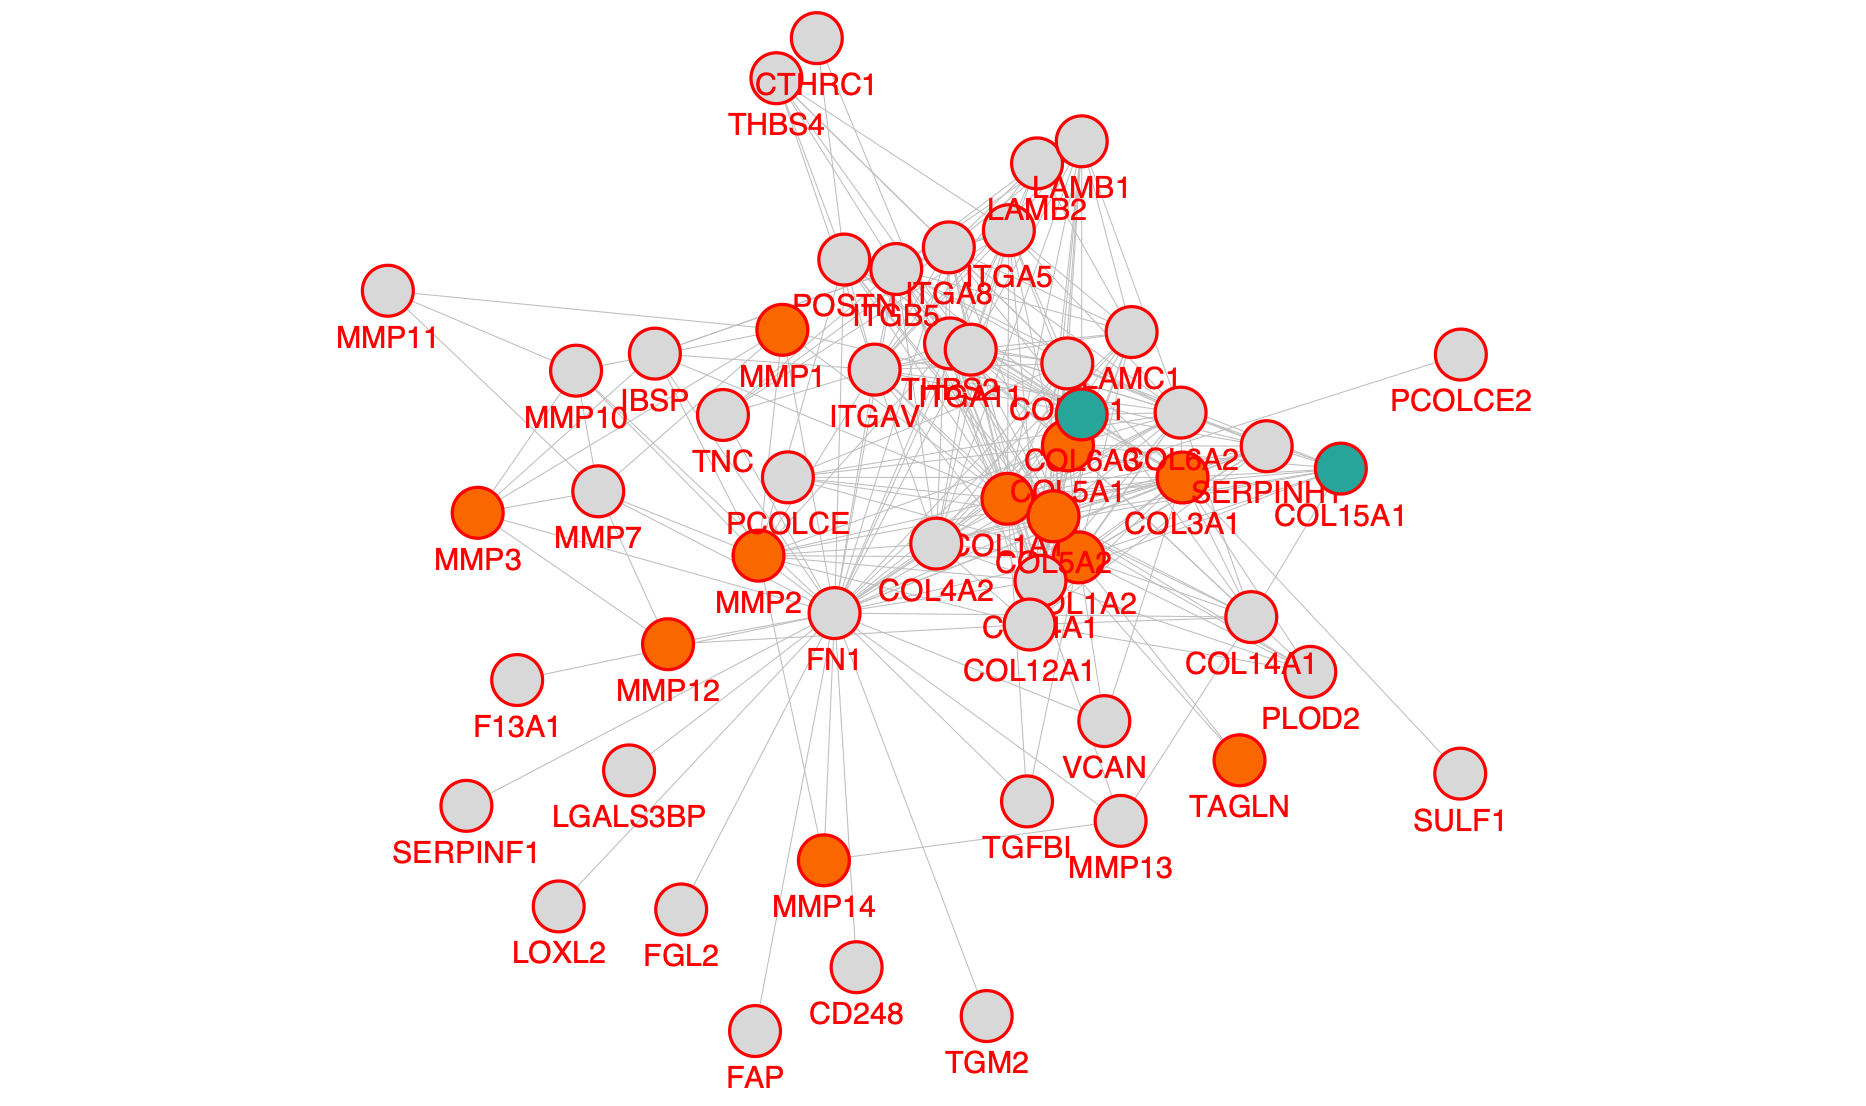

In [160]:
plot_cluster_network(cluster_proteins, 0, df_cat,disease_name='aortic_aneurysm')
p4c.notebook_export_show_image()

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


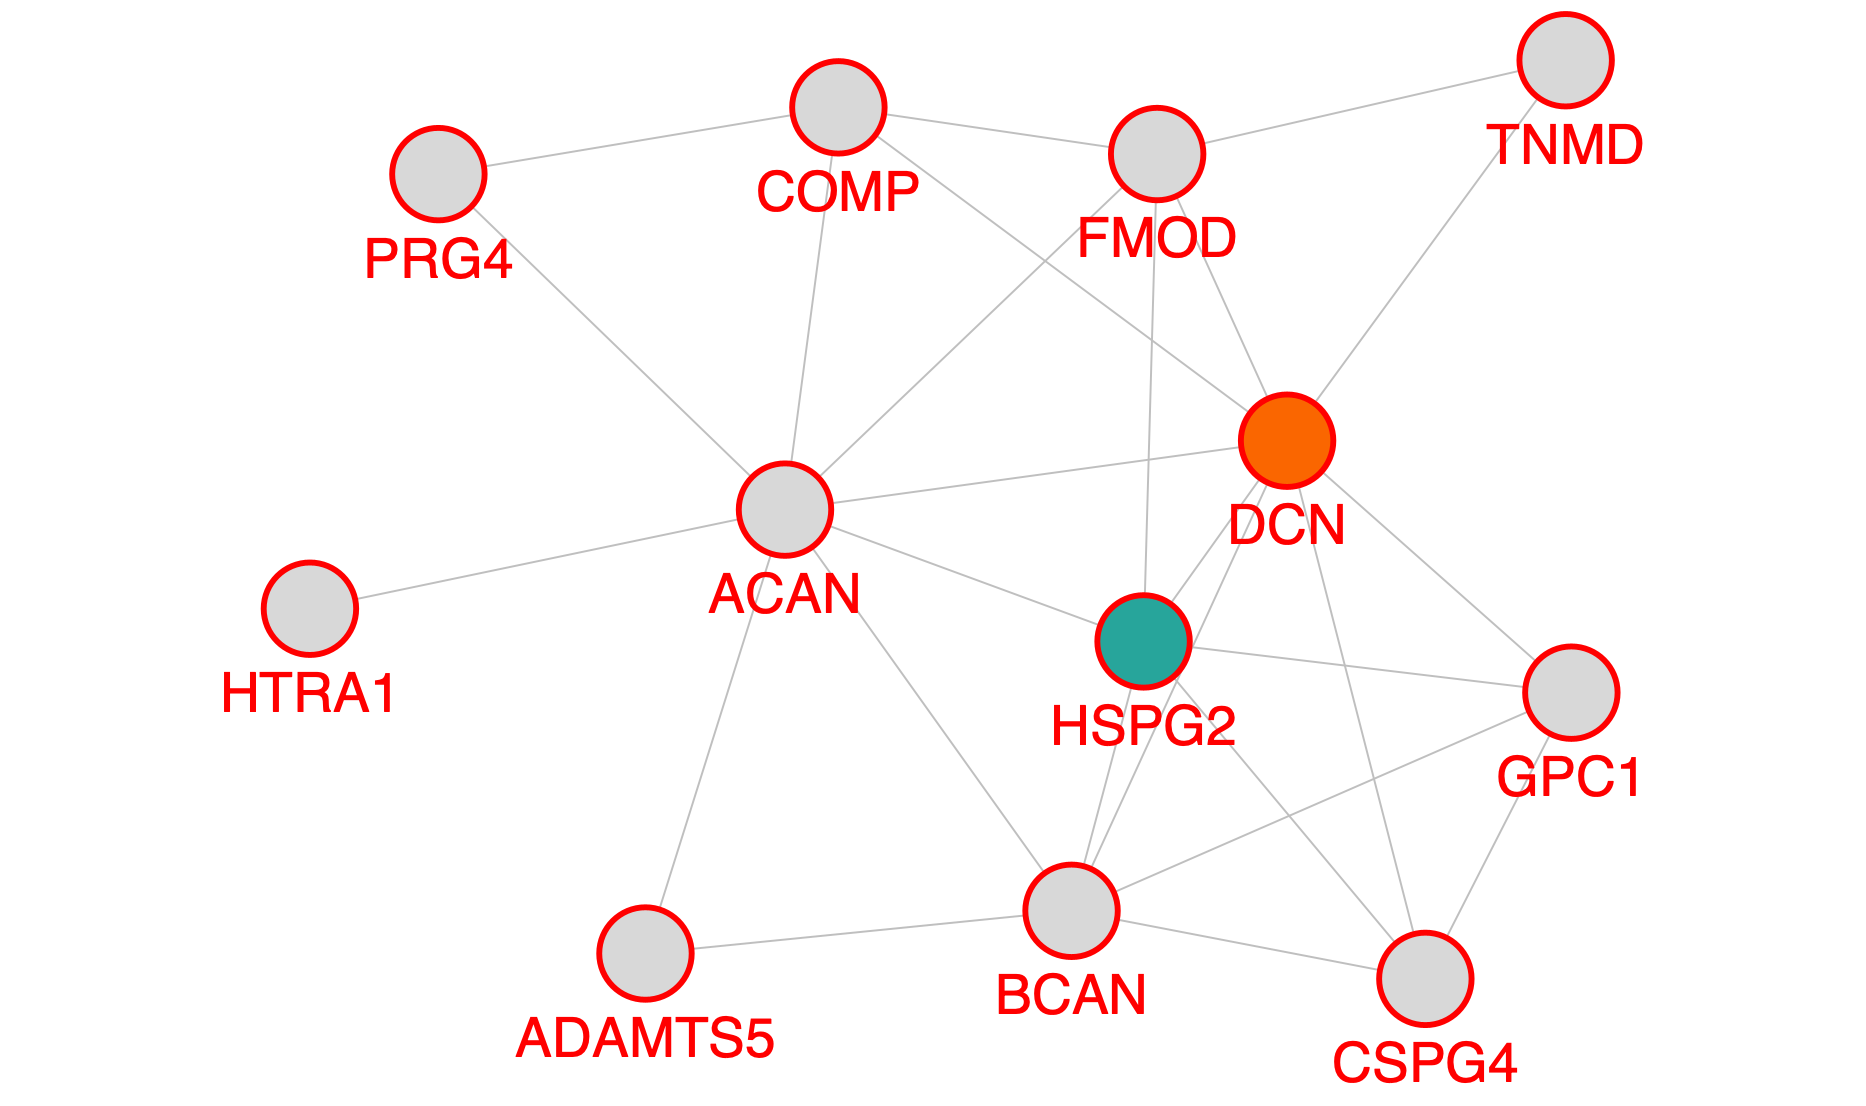

In [167]:
plot_cluster_network(cluster_proteins, 4, df_cat,disease_name='aortic_aneurysm')
p4c.notebook_export_show_image()